In [83]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [84]:
train = pd.read_csv('heartdataset.csv')
train.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


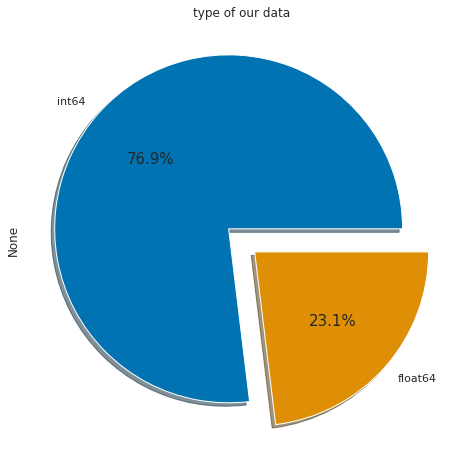

In [86]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

In [87]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [88]:
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [89]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

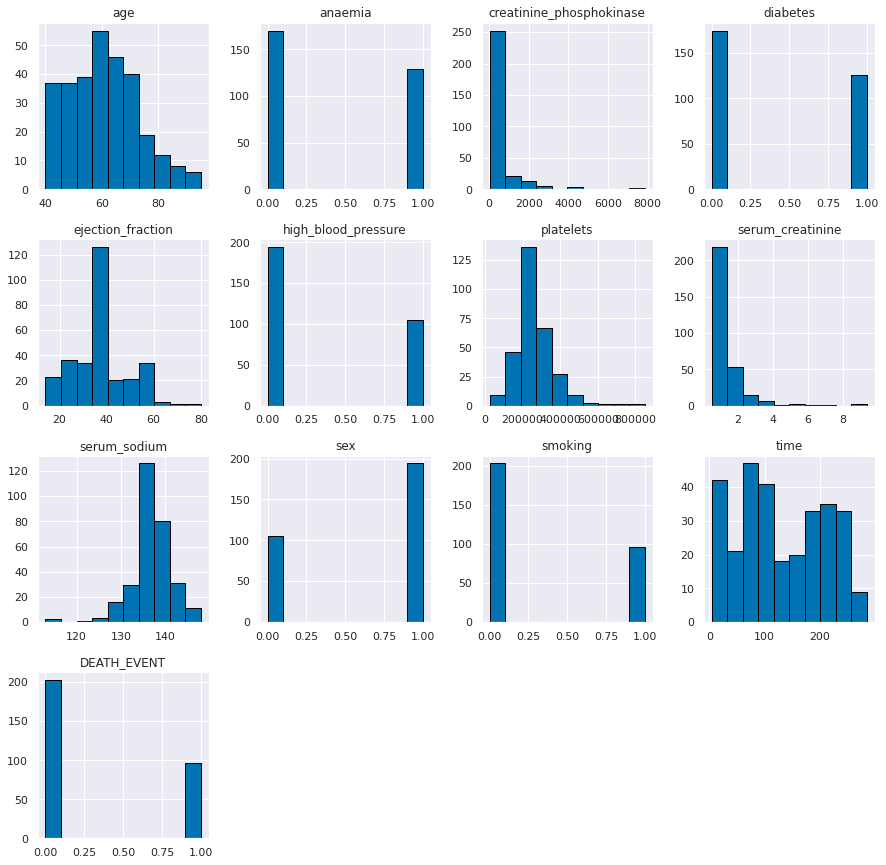

In [90]:
train.hist(figsize=(15,15),edgecolor='black');

Text(0.5, 1.0, 'the % of deaths')

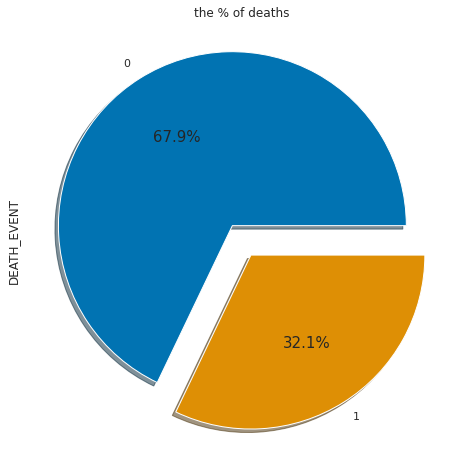

In [91]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

Text(0.5, 1.0, 'the ages of our persone')

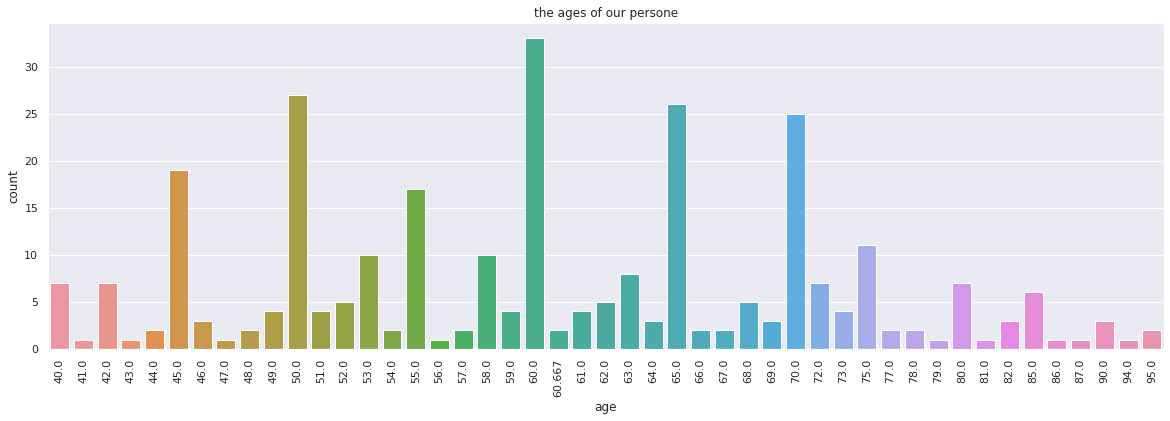

In [92]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('the ages of our persone')

In [93]:

# Distribution of Age


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

In [94]:
# Distribution of AGE Vs DEATH_EVENT

fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()

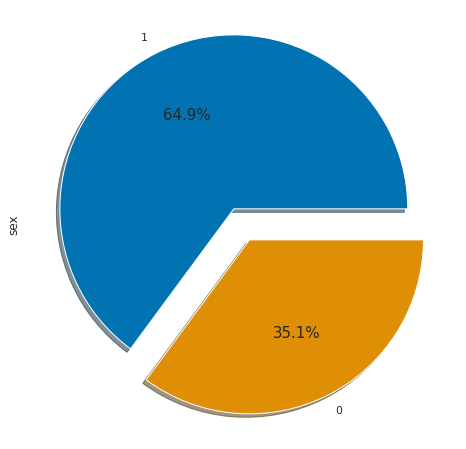

In [95]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

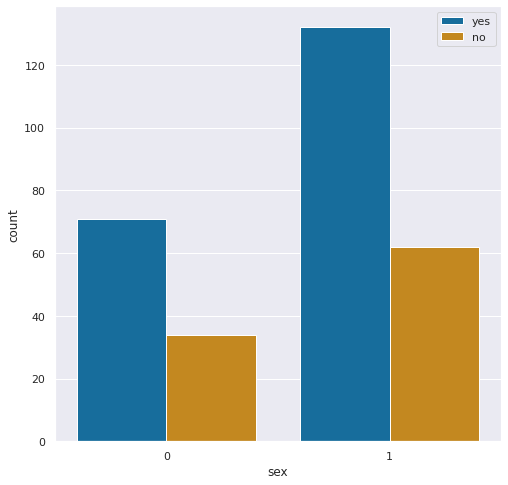

In [96]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])

In [97]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

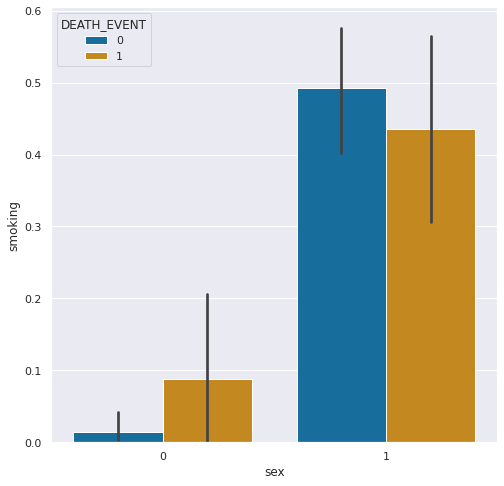

In [98]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

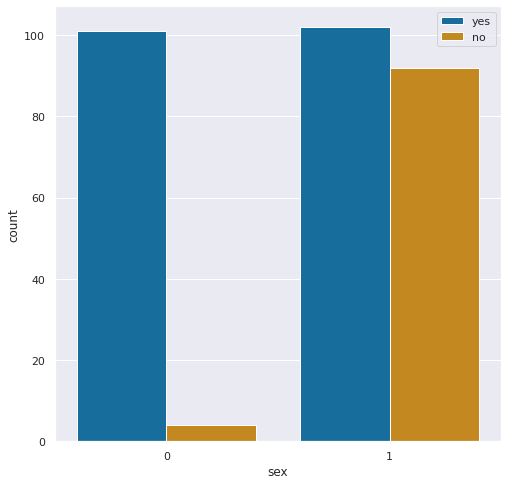

In [99]:
sns.countplot(x='sex',hue='smoking',data=train)
plt.legend(['yes','no']);

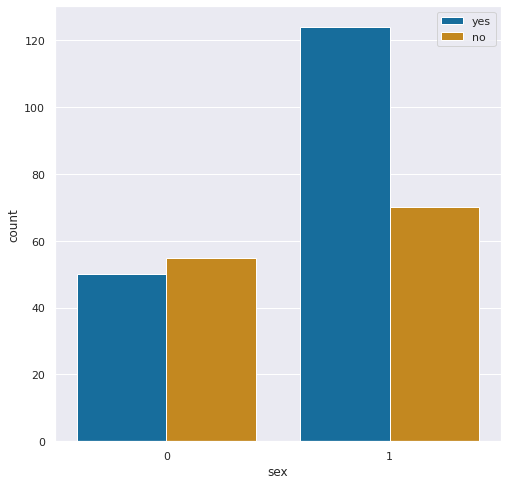

In [100]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

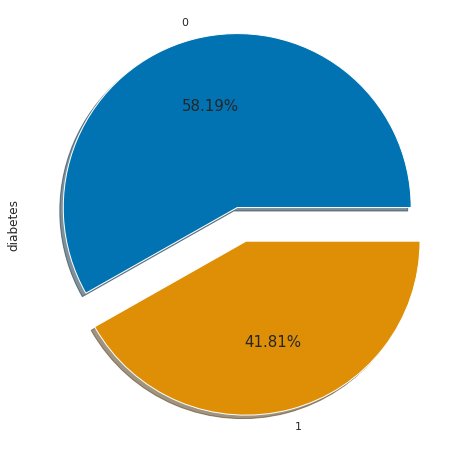

In [101]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%2.2f%%',shadow=True)

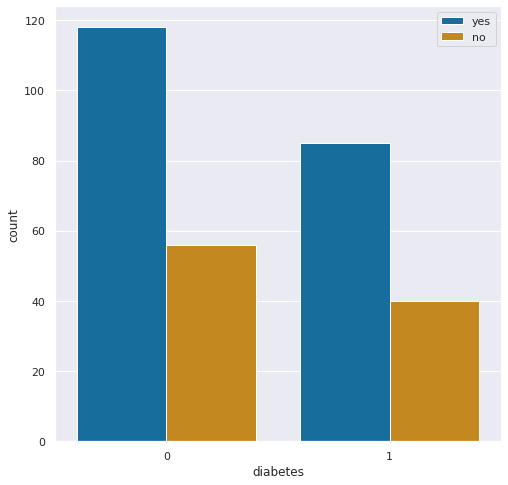

In [102]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

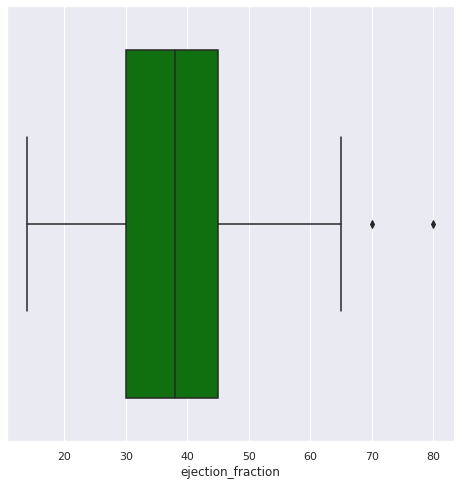

In [103]:
sns.boxplot(x = train.ejection_fraction, color = 'green')
plt.show()

In [104]:
train[train['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [105]:
train = train[train['ejection_fraction']<70]

In [106]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()

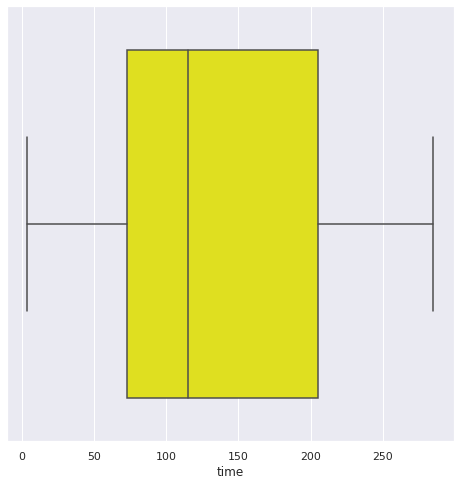

In [107]:
sns.boxplot(x=train.time, color = 'yellow')
plt.show()

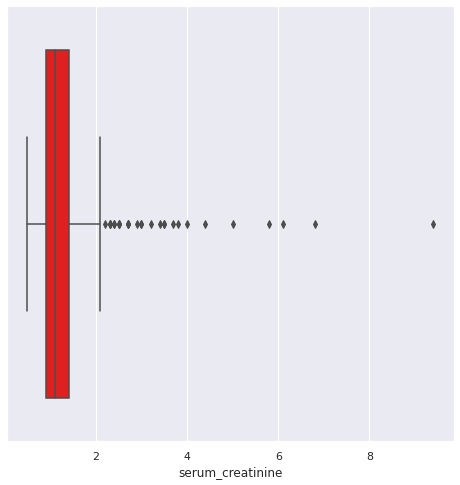

In [108]:
sns.boxplot(x=train.serum_creatinine, color = 'red')
plt.show()

In [109]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-109-666c4ce31351>:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.11,0.08,0.09,-0.05,0.19,-0.05,0.06,0.01,-0.23,0.26
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.03,-0.04,0.03,0.04,-0.09,-0.11,-0.15,0.06
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.01,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.11,-0.01,-0.01,1.00,0.01,-0.01,0.09,-0.03,-0.09,-0.17,-0.15,0.03,0.00
ejection_fraction,0.08,0.03,-0.04,0.01,1.00,0.02,0.09,-0.09,0.18,-0.12,-0.05,0.05,-0.28
high_blood_pressure,0.09,0.03,-0.07,-0.01,0.02,1.00,0.06,-0.04,0.04,-0.10,-0.05,-0.20,0.07
platelets,-0.05,-0.04,0.02,0.09,0.09,0.06,1.00,-0.01,0.06,-0.13,0.03,0.01,-0.04
serum_creatinine,0.19,0.03,-0.01,-0.03,-0.09,-0.04,-0.01,1.00,-0.21,0.04,-0.01,-0.19,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.21,1.00,-0.03,0.01,0.09,-0.20
sex,0.06,-0.09,0.08,-0.17,-0.12,-0.10,-0.13,0.04,-0.03,1.00,0.44,-0.02,-0.00


[0.09299263 0.02681385 0.0764439  0.03061924 0.13902999 0.02597153
 0.06972017 0.11163383 0.08694591 0.02831185 0.02746202 0.28405509]


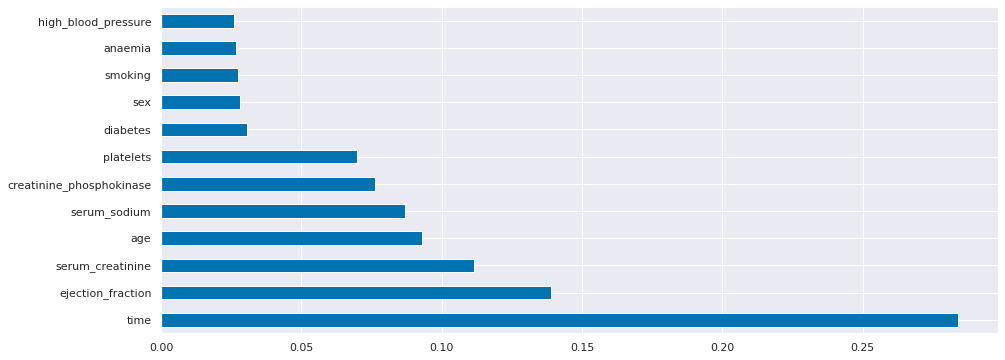

In [110]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [111]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [112]:
train

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,20,1.9,130,4,1
1,38,1.1,136,6,1
2,20,1.3,129,7,1
3,20,1.9,137,7,1
4,20,2.7,116,8,1
...,...,...,...,...,...
294,38,1.1,143,270,0
295,38,1.2,139,271,0
296,60,0.8,138,278,0
297,38,1.4,140,280,0


In [113]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

<ipython-input-113-baa3b05b80f8>:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
ejection_fraction,1.000,-0.087,0.180,0.046,-0.285
serum_creatinine,-0.087,1.000,-0.211,-0.189,0.286
serum_sodium,0.180,-0.211,1.000,0.088,-0.196
time,0.046,-0.189,0.088,1.000,-0.537
DEATH_EVENT,-0.285,0.286,-0.196,-0.537,1.000


In [114]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [115]:
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT

In [116]:
print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [118]:
print(x_train)
print(y_test)

     ejection_fraction  serum_creatinine  serum_sodium  time
22                  35              0.90           140    20
293                 35              0.90           136   270
103                 30              1.00           140    87
246                 25              1.10           138   214
136                 60              0.90           137   107
..                 ...               ...           ...   ...
47                  38              0.60           138    40
264                 38              1.20           141   237
204                 40              0.70           137   187
85                  50              0.70           140    79
122                 38              0.75           140    95

[207 rows x 4 columns]
106    0
260    0
45     1
26     1
221    0
      ..
163    1
184    1
187    1
286    0
263    0
Name: DEATH_EVENT, Length: 90, dtype: int64


In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [120]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)


mylist.append(acc_logreg)
print(cm)
print(acc_logreg)


#accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', acc_logreg)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[57  4]
 [ 9 20]]
0.8555555555555555
Accuracy :  0.8555555555555555
Sensitivity :  0.9344262295081968
Specificity :  0.6896551724137931
Area Under Curve :  0.8120407009609949


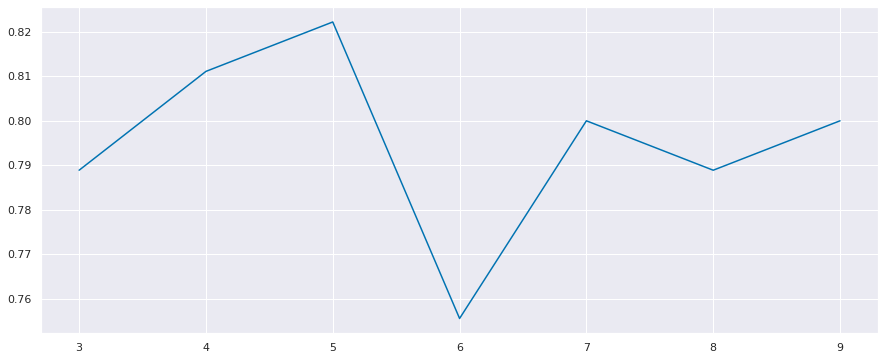

In [121]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [122]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [123]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0]


In [124]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)
total1=sum(sum(cm))

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[55  6]
 [10 19]]
0.8222222222222222
Accuracy :  0.8222222222222222
Sensitivity :  0.9016393442622951
Specificity :  0.6551724137931034
Area Under Curve :  0.7784058790276992


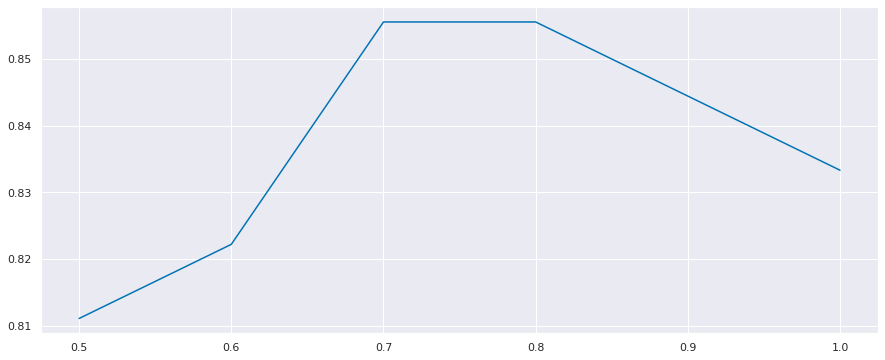

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [126]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.7, random_state=0)

In [127]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [128]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[56  5]
 [ 8 21]]
0.8555555555555555
Accuracy :  0.8555555555555555
Sensitivity :  0.9180327868852459
Specificity :  0.7241379310344828
Area Under Curve :  0.8210853589598643


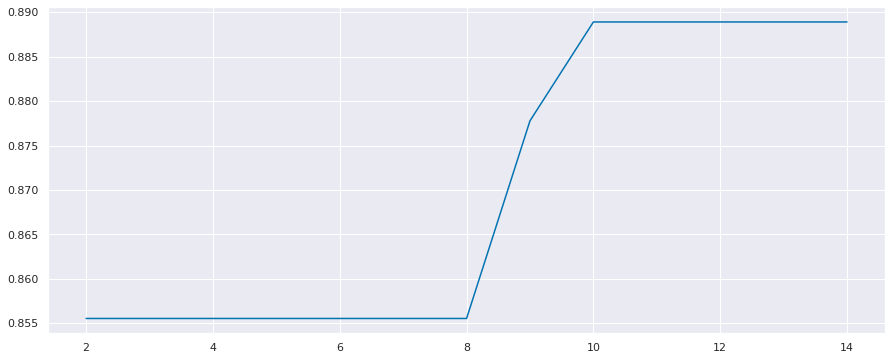

In [129]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [130]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [131]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0]


In [132]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[56  5]
 [ 5 24]]
0.8888888888888888
Accuracy :  0.8888888888888888
Sensitivity :  0.9180327868852459
Specificity :  0.8275862068965517
Area Under Curve :  0.8728094968908987


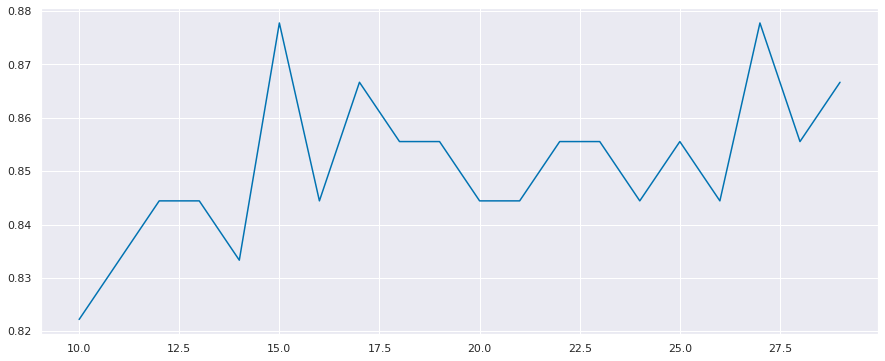

In [133]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [134]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [135]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [136]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[56  5]
 [ 6 23]]
0.8777777777777778
Accuracy :  0.8777777777777778
Sensitivity :  0.9180327868852459
Specificity :  0.7931034482758621
Area Under Curve :  0.8555681175805541


In [137]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

In [138]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [139]:
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))


In [140]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [141]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [142]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [143]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [144]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6642 - accuracy: 0.6812
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6860
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6860
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.6957
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5613 - accuracy: 0.6957
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.7101
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7295
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7536
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7681
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4889 - accuracy: 0.7923
Epoch 11/

In [145]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 5ms/step


In [146]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)


accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)


Confusion Matrix
[[54  7]
 [10 19]]

Accuracy
0.8111111111111111
Accuracy :  0.8111111111111111
Sensitivity :  0.8852459016393442
Specificity :  0.6551724137931034
Area Under Curve :  0.7702091577162238


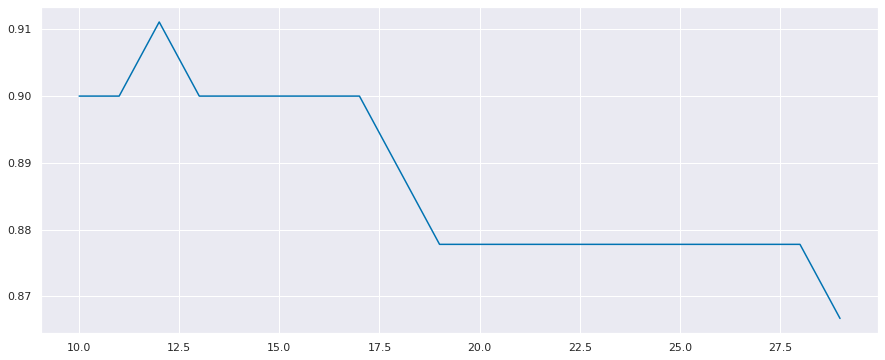

In [147]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [148]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(max_depth=12, n_estimators=10, subsample=0.7)

In [149]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0]


In [150]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

auc = metrics.roc_auc_score(y_test, y_pred)
print('Area Under Curve : ', auc)

[[57  4]
 [ 5 24]]
0.9
Accuracy :  0.9
Sensitivity :  0.9344262295081968
Specificity :  0.8275862068965517
Area Under Curve :  0.8810062182023741


In [151]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'ANN',   
              'Decision Tree','xgboost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, acc_decisiontree,ac_xgboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,xgboost,0.900000
5,Decision Tree,0.888889
3,Random Forest,0.877778
0,Support Vector Machines,0.855556
2,Logistic Regression,0.855556
1,KNN,0.822222
4,ANN,0.811111


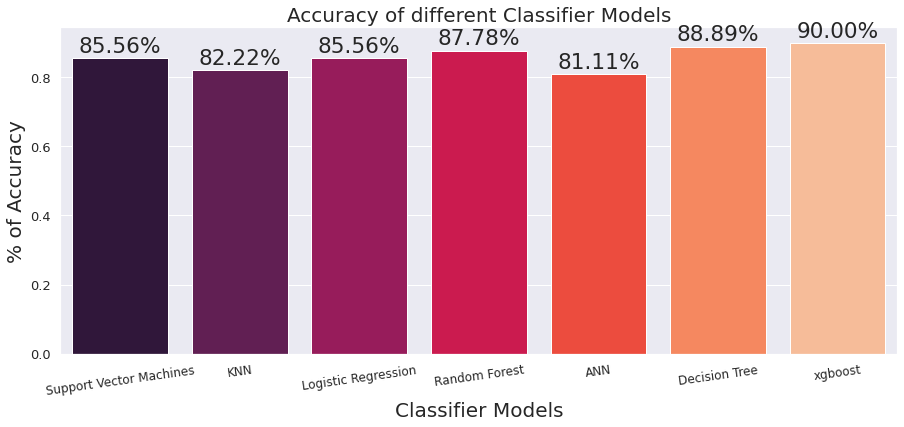

In [152]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()